In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
df = pd.read_csv("./data/spotify_top_songs_audio_features.csv")
df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [4]:
df.shape

(6513, 19)

In [5]:
df.dtypes

id                   object
artist_names         object
track_name           object
source               object
key                  object
mode                 object
time_signature       object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
tempo               float64
duration_ms           int64
weeks_on_chart        int64
streams               int64
dtype: object

In [6]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


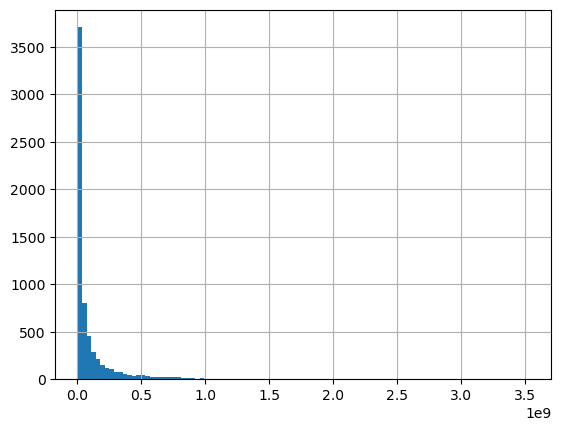

In [7]:
df["streams"].hist(bins = 100)
plt.show()

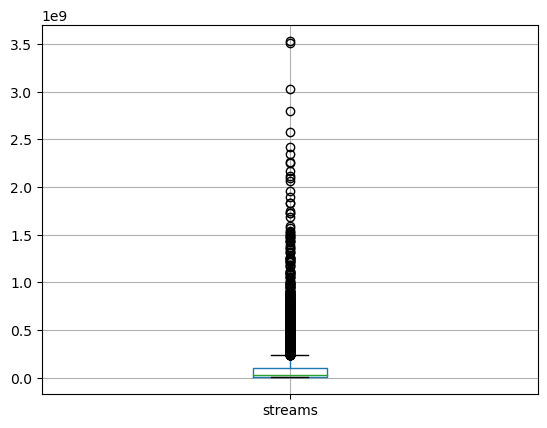

In [8]:
df.boxplot(column = ["streams"])
plt.show()

In [9]:
vis_df = df.iloc[:, 7:]
vis_df.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [10]:
def plot_hist(df):
    plt.rcParams["figure.figsize"] = [20, 16]
    fig = plt.figure(1) # 해당 피규어에 id를 매겨주는 것
    
    # df의 열 개수 만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

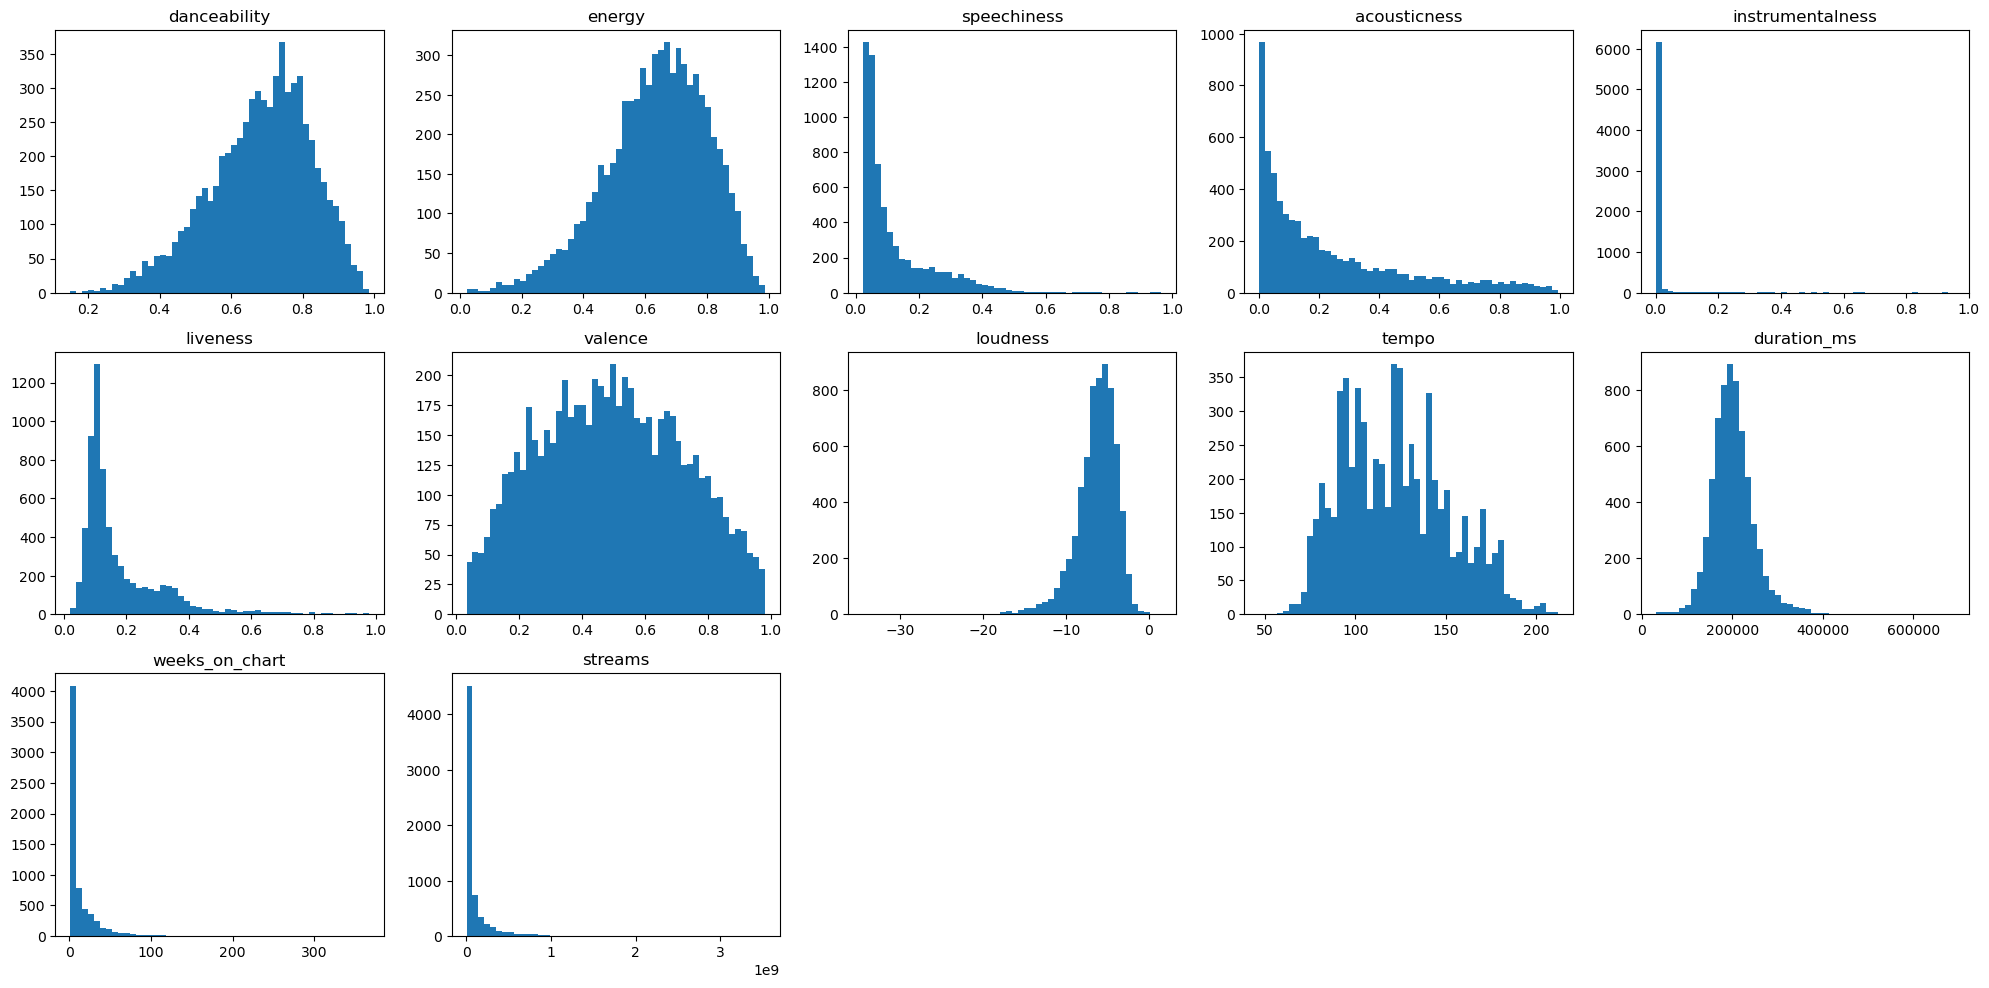

In [11]:
plot_hist(vis_df)

# 데이터 분할

In [12]:
x = df.drop(['id', 'artist_names', 'track_name', 'source', 'key', 'mode', 'time_signature', 'streams'], axis = 1)
y = df["streams"]

In [13]:
x.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart
0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17
1,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2
2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125
3,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2
4,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [15]:
x_train.shape, x_test.shape

((4559, 11), (1954, 11))

In [16]:
x_train.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo',
       'duration_ms', 'weeks_on_chart'],
      dtype='object')

In [17]:
scale_col = x_train.columns.tolist()

In [18]:
scale_col

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'loudness',
 'tempo',
 'duration_ms',
 'weeks_on_chart']

In [19]:
df_ss = StandardScaler()
scaled_train = df_ss.fit_transform(x_train[scale_col])
scaled_test = df_ss.transform(x_test[scale_col])

In [20]:
scaled_train = pd.DataFrame(scaled_train, columns = scale_col)
scaled_test = pd.DataFrame(scaled_test, columns = scale_col)

In [21]:
scaled_train.shape, scaled_test.shape

((4559, 11), (1954, 11))

In [22]:
len(y_train), len(y_test)

(4559, 1954)

In [23]:
scaled_train.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart
0,1.298148,-0.829439,-0.316019,-0.919166,-0.166680,-0.595400,-0.788700,-1.739413,-0.994196,-0.377921,-0.446262
1,0.366374,-0.194598,-0.458343,-0.927316,-0.167690,0.970207,-1.076526,-0.829782,-0.618200,0.685355,-0.404311
2,0.928284,-0.285290,1.958541,0.441091,-0.167690,-1.056503,0.978111,-0.074425,-1.028070,0.668590,-0.488213
3,-0.231099,-0.146229,0.052093,-0.955189,-0.167690,0.612763,-1.836388,0.086488,0.954008,-0.156364,-0.404311
4,0.800254,1.256467,0.113591,-0.541000,-0.167541,-0.066382,1.212800,0.992994,1.639379,1.047098,0.308860


# 모델 훈련

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(scaled_train, y_train)

LinearRegression()

In [26]:
lr.coef_

array([ 3.42730265e+05, -2.22773937e+05, -3.10837906e+06,  1.42455388e+06,
       -3.42318679e+05,  4.94448852e+05, -9.97391491e+04,  1.04339918e+06,
        1.91290625e+06, -2.96792171e+06,  1.83453241e+08])

In [27]:
lr.intercept_

106977785.18249616

# 모델 평가

In [28]:
lr.score(scaled_test, y_test)

0.7510662907784781

In [29]:
pred = lr.predict(scaled_test)

In [30]:
r2 = r2_score(y_test, pred)
r2

0.7510662907784781

# 모델 최적화

In [62]:
# x_train, x_test에 상수항 추가
x_train_new = sm.add_constant(scaled_train)

# OLS 검정
full_mod = sm.OLS(y_train.reset_index(drop = True), x_train_new)

# 모델 훈련
full_res = full_mod.fit()

# 모델 요약 출력
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:50:58   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4547   BIC:                         1.823e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.07e+08    1.7e+06     62.867      0.000    1.04e+08     1.1e+08
danceability      3.427e+05   1.96e+06      0.175      0.861   -3.49e+06    4.18e+06
energy           -2.228e+05   2.83e+06     -0.079      0.937   -5.78e+06    5.33e+06
speechiness      -3.108e+06   1.78e+06     -1.750      0.080   -6.59e+06    3.74e+05
acousticness      1.425e+06   2.09e+06      0.681      0.496   -2.68e+06    5.53e+06
instrumentalness -3.423e+05   1.77e+06     -0.194      0.847   -3.81e+06    3.13e+06
liveness          4.944e+05   1.74e+06      0.285      0.776   -2.91e+06     3.9e+06
valence          -9.974e+04   2.01e+06     -0.050      0.961   -4.05e+06    3.85e+06
loudness          1.043e+06    2.6e+06      0.401      0.688   -4.05e+06    6.14e+06
tempo             1.913e+06   1.74e+06      1.101      0.271   -1.49e+06    5.32e+06
duration_ms      -2.968e+06   1.75e+06     -1.697      0.090    -6.4e+06    4.61e+05
weeks_on_chart    1.835e+08   1.72e+06    106.756      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.990   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182689.652
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.727   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

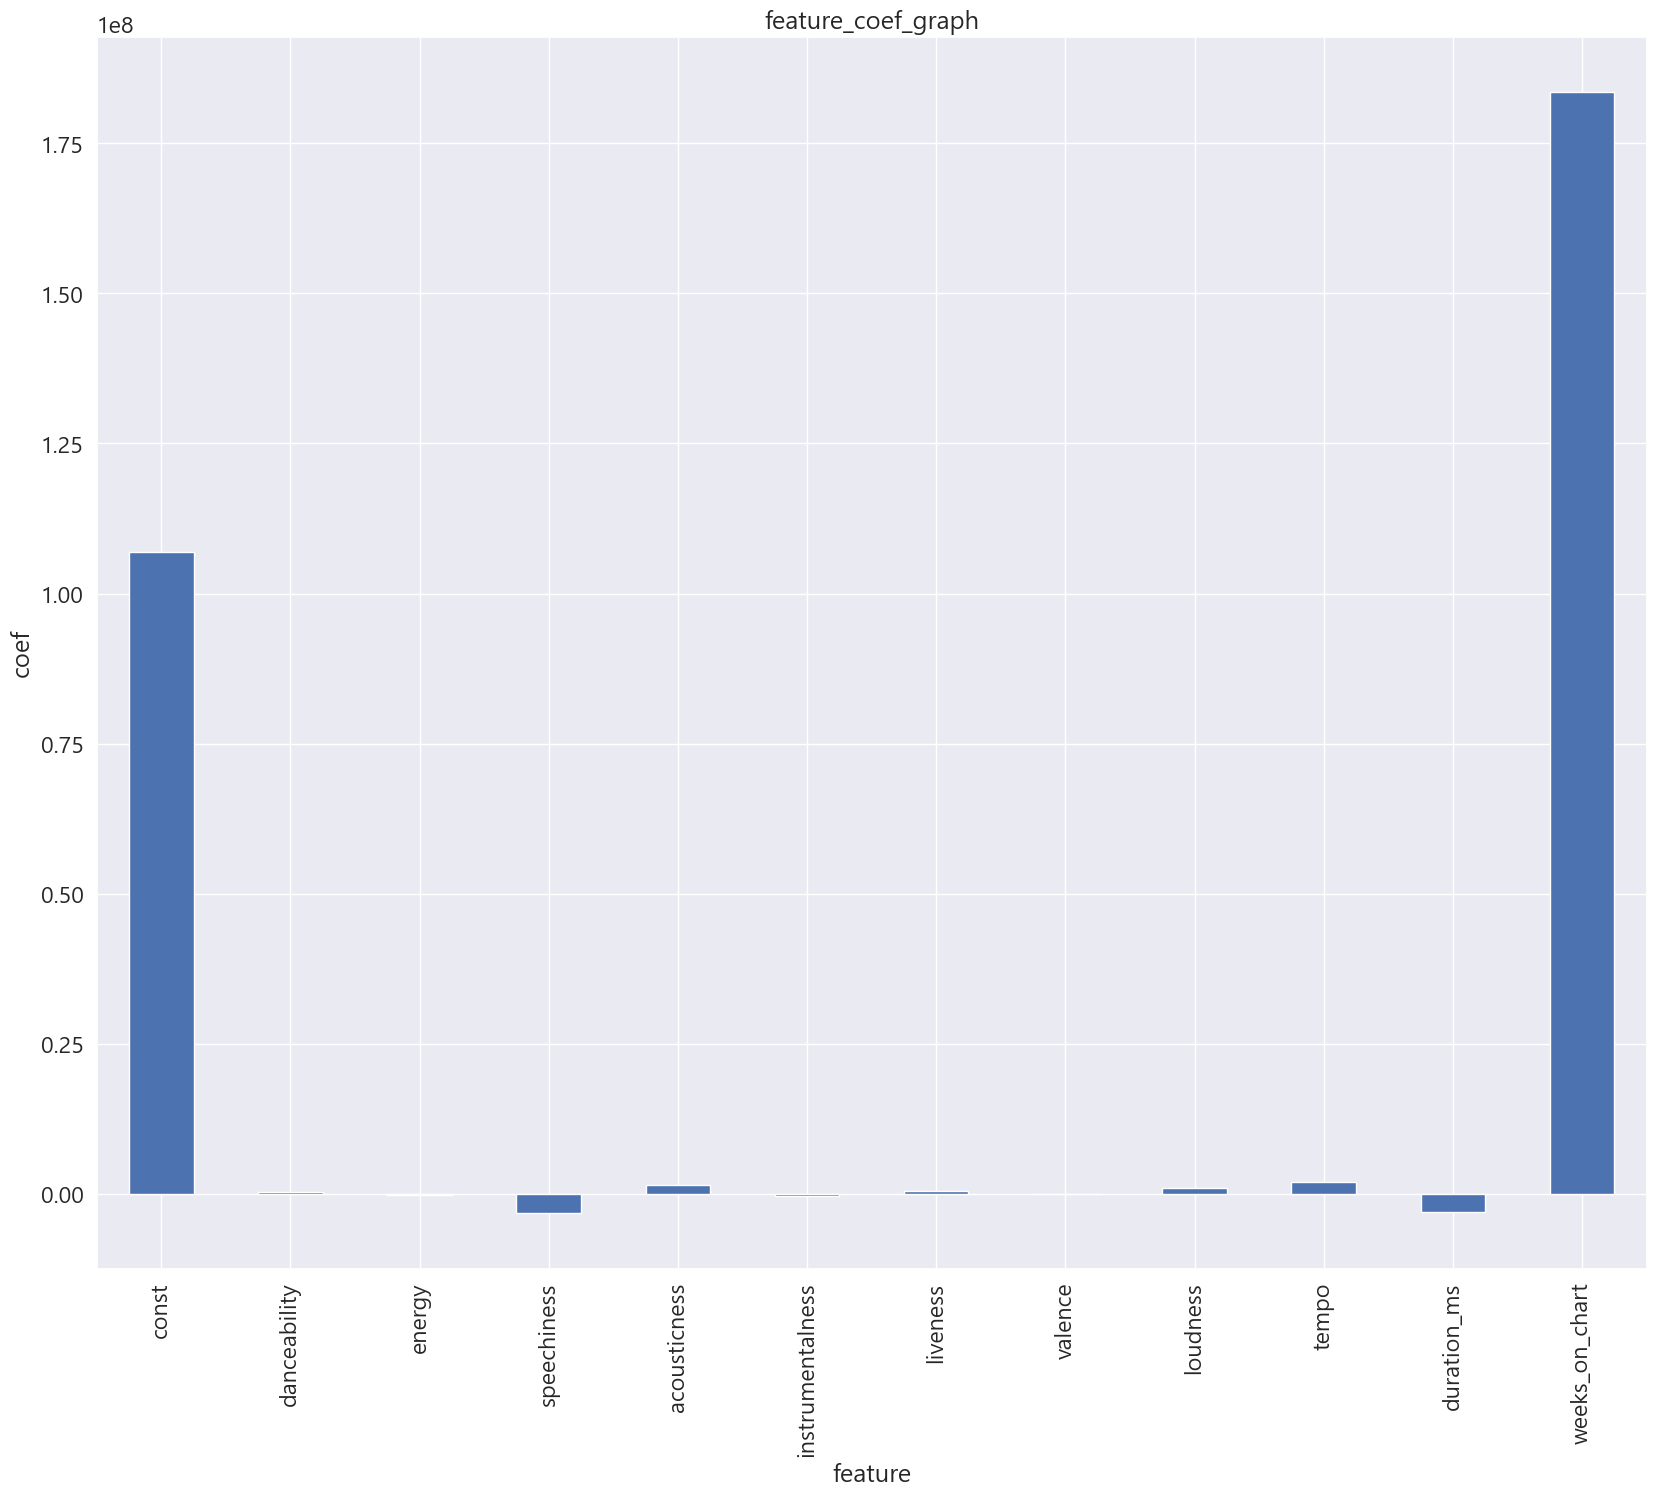

In [55]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = full_res.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 변환
x_labels = full_res.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("feature")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


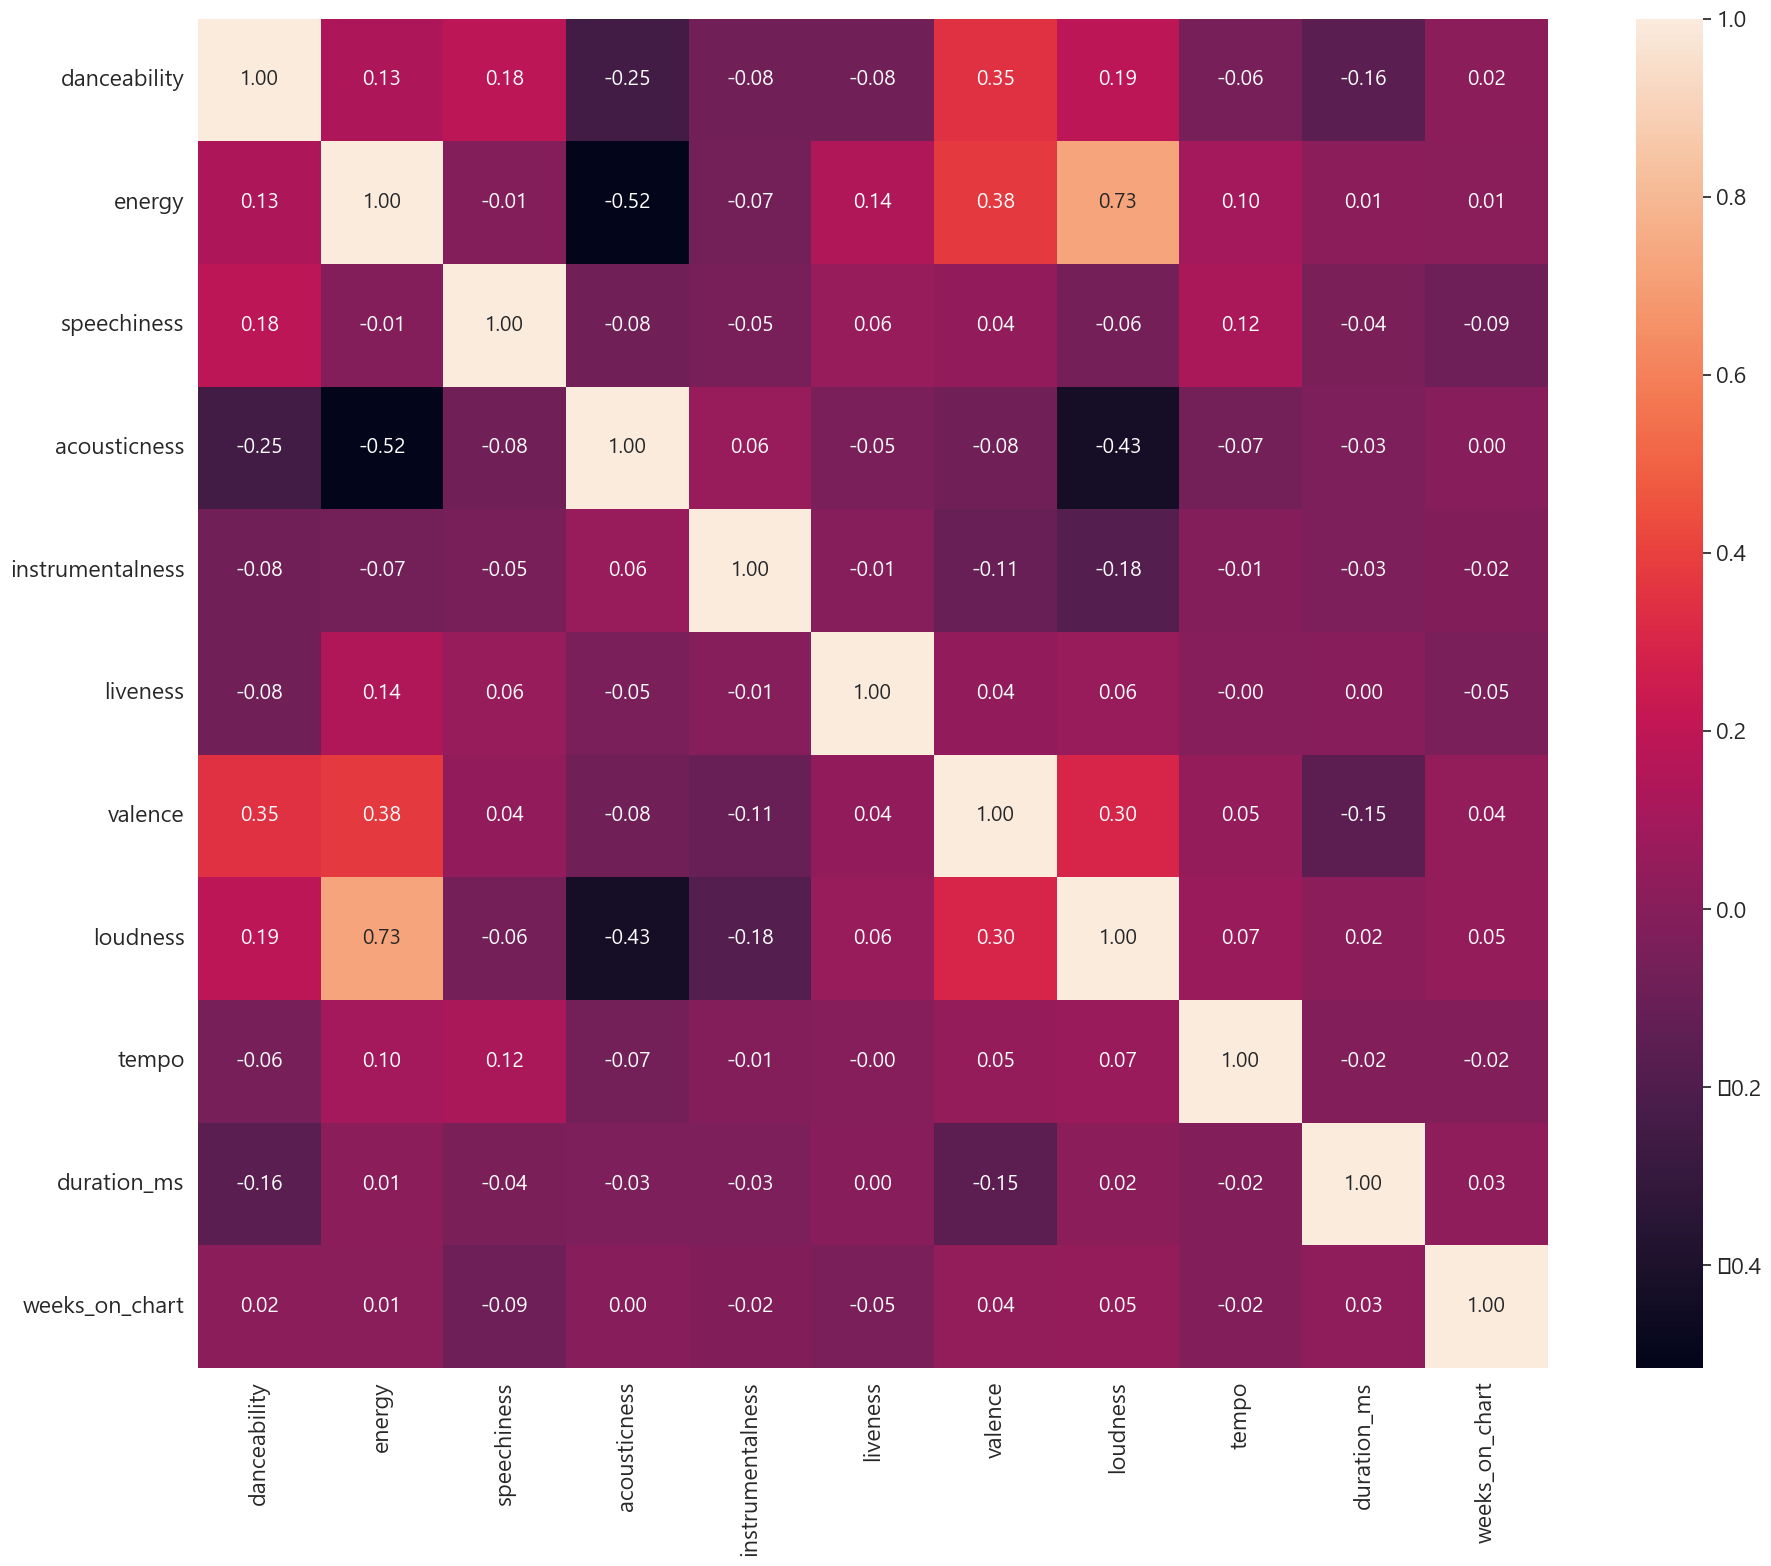

In [56]:
# 피처들의 상관관계 시각화
corr = df[scale_col].corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

In [34]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif["feature"] = x_train_new.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.3,danceability
2,2.8,energy
3,1.1,speechiness
4,1.5,acousticness
5,1.1,instrumentalness
6,1.0,liveness
7,1.4,valence
8,2.3,loudness
9,1.0,tempo


## 변수제거 1
- valence

In [36]:
new_x = x_train_new.drop("valence", axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:39:56   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4548   BIC:                         1.822e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.07e+08    1.7e+06     62.874      0.000    1.04e+08     1.1e+08
danceability      3.109e+05   1.85e+06      0.168      0.866   -3.31e+06    3.93e+06
energy           -2.666e+05   2.69e+06     -0.099      0.921   -5.54e+06    5.01e+06
speechiness      -3.105e+06   1.78e+06     -1.749      0.080   -6.59e+06    3.75e+05
acousticness      1.402e+06   2.04e+06      0.687      0.492    -2.6e+06     5.4e+06
instrumentalness -3.331e+05   1.76e+06     -0.189      0.850   -3.78e+06    3.11e+06
liveness          4.926e+05   1.73e+06      0.284      0.776   -2.91e+06    3.89e+06
loudness          1.044e+06    2.6e+06      0.401      0.688   -4.05e+06    6.14e+06
tempo             1.908e+06   1.73e+06      1.100      0.271   -1.49e+06    5.31e+06
duration_ms      -2.957e+06   1.73e+06     -1.705      0.088   -6.36e+06    4.43e+05
weeks_on_chart    1.834e+08   1.72e+06    106.865      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2743.095   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182704.559
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.729   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif["feature"] = x_train_new.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.3,danceability
2,2.8,energy
3,1.1,speechiness
4,1.5,acousticness
5,1.1,instrumentalness
6,1.0,liveness
7,1.4,valence
8,2.3,loudness
9,1.0,tempo


## 변수제거2

- valence, energy

In [38]:
new_x = x_train_new.drop(["valence", "energy"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:40:04   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4549   BIC:                         1.822e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.07e+08    1.7e+06     62.881      0.000    1.04e+08     1.1e+08
danceability      3.236e+05   1.84e+06      0.176      0.861   -3.29e+06    3.93e+06
speechiness      -3.108e+06   1.77e+06     -1.751      0.080   -6.59e+06    3.71e+05
acousticness      1.469e+06   1.92e+06      0.764      0.445    -2.3e+06    5.24e+06
instrumentalness -3.516e+05   1.75e+06     -0.201      0.841   -3.78e+06    3.08e+06
liveness           4.72e+05   1.72e+06      0.274      0.784    -2.9e+06    3.85e+06
loudness          8.735e+05   1.95e+06      0.448      0.654   -2.95e+06     4.7e+06
tempo             1.898e+06   1.73e+06      1.096      0.273    -1.5e+06    5.29e+06
duration_ms      -2.956e+06   1.73e+06     -1.705      0.088   -6.35e+06    4.43e+05
weeks_on_chart    1.835e+08   1.72e+06    106.894      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.833   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182644.677
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.724   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif["feature"] = x_train_new.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.3,danceability
2,2.8,energy
3,1.1,speechiness
4,1.5,acousticness
5,1.1,instrumentalness
6,1.0,liveness
7,1.4,valence
8,2.3,loudness
9,1.0,tempo


## 변수제거3

- valence, energy, danceability

In [42]:
new_x = x_train_new.drop(["valence", "energy", "danceability"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1458.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:40:19   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4550   BIC:                         1.822e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.07e+08    1.7e+06     62.888      0.000    1.04e+08     1.1e+08
speechiness      -3.046e+06   1.74e+06     -1.752      0.080   -6.46e+06    3.63e+05
acousticness      1.411e+06   1.89e+06      0.745      0.456    -2.3e+06    5.12e+06
instrumentalness -3.706e+05   1.74e+06     -0.212      0.832   -3.79e+06    3.05e+06
liveness          4.391e+05   1.71e+06      0.257      0.798   -2.92e+06    3.79e+06
loudness          9.112e+05   1.94e+06      0.470      0.639   -2.89e+06    4.71e+06
tempo             1.862e+06   1.72e+06      1.083      0.279   -1.51e+06    5.23e+06
duration_ms       -3.01e+06   1.71e+06     -1.764      0.078   -6.35e+06    3.36e+05
weeks_on_chart    1.835e+08   1.72e+06    106.972      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.383   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182528.164
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.714   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif["feature"] = x_train_new.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.3,danceability
2,2.8,energy
3,1.1,speechiness
4,1.5,acousticness
5,1.1,instrumentalness
6,1.0,liveness
7,1.4,valence
8,2.3,loudness
9,1.0,tempo


## 변수제거4

- valence, energy, danceability, instrumentalness

In [44]:
new_x = x_train_new.drop(["valence", "energy", "danceability", "instrumentalness"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1667.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:40:24   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4551   BIC:                         1.822e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.07e+08    1.7e+06     62.894      0.000    1.04e+08     1.1e+08
speechiness    -3.019e+06   1.73e+06     -1.741      0.082   -6.42e+06    3.81e+05
acousticness    1.421e+06   1.89e+06      0.751      0.453   -2.29e+06    5.13e+06
liveness        4.327e+05   1.71e+06      0.253      0.800   -2.92e+06    3.79e+06
loudness         9.93e+05    1.9e+06      0.522      0.601   -2.73e+06    4.72e+06
tempo           1.857e+06   1.72e+06      1.081      0.280   -1.51e+06    5.23e+06
duration_ms    -2.992e+06    1.7e+06     -1.756      0.079   -6.33e+06    3.49e+05
weeks_on_chart  1.835e+08   1.71e+06    107.007      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.103   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182492.874
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.711   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

,VIF_Factor,feature
0,22.1,danceability
1,24.1,energy
2,2.3,speechiness
3,2.6,acousticness
4,1.1,instrumentalness
5,2.8,liveness
6,7.9,valence
7,10.1,loudness
8,16.6,tempo
9,15.9,duration_ms


# 변수제거 5

- valence, energy, danceability, instrumentalness, liveness

In [46]:
new_x = x_train_new.drop(["valence", "energy", "danceability", "instrumentalness", "liveness"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1945.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:40:48   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4552   BIC:                         1.822e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.07e+08    1.7e+06     62.901      0.000    1.04e+08     1.1e+08
speechiness    -2.991e+06   1.73e+06     -1.729      0.084   -6.38e+06    4.01e+05
acousticness    1.414e+06   1.89e+06      0.747      0.455    -2.3e+06    5.13e+06
loudness        1.022e+06    1.9e+06      0.539      0.590    -2.7e+06    4.74e+06
tempo           1.849e+06   1.72e+06      1.076      0.282   -1.52e+06    5.22e+06
duration_ms    -2.988e+06    1.7e+06     -1.754      0.080   -6.33e+06    3.52e+05
weeks_on_chart  1.834e+08   1.71e+06    107.143      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.420   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182510.521
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.712   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

,VIF_Factor,feature
0,22.1,danceability
1,24.1,energy
2,2.3,speechiness
3,2.6,acousticness
4,1.1,instrumentalness
5,2.8,liveness
6,7.9,valence
7,10.1,loudness
8,16.6,tempo
9,15.9,duration_ms


In [63]:
new_x = x_train_new.drop(["valence", "energy", "danceability", "instrumentalness", "liveness", "loudness"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2335.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:51:28   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4553   BIC:                         1.822e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.07e+08    1.7e+06     62.906      0.000    1.04e+08     1.1e+08
speechiness    -3.076e+06   1.72e+06     -1.785      0.074   -6.45e+06    3.03e+05
acousticness    9.741e+05   1.71e+06      0.571      0.568   -2.37e+06    4.32e+06
tempo           1.902e+06   1.72e+06      1.109      0.267   -1.46e+06    5.26e+06
duration_ms    -2.996e+06    1.7e+06     -1.759      0.079   -6.34e+06    3.44e+05
weeks_on_chart  1.835e+08   1.71e+06    107.374      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2742.877   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182561.155
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      33.716   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
new_x = x_train_new.drop(["valence", "energy", "danceability", "instrumentalness", "liveness", "loudness",
                         "acousticness"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2919.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:51:44   Log-Likelihood:                -91076.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4554   BIC:                         1.822e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.07e+08    1.7e+06     62.910      0.000    1.04e+08     1.1e+08
speechiness    -3.125e+06   1.72e+06     -1.816      0.069    -6.5e+06    2.49e+05
tempo           1.845e+06   1.71e+06      1.078      0.281   -1.51e+06     5.2e+06
duration_ms    -3.029e+06    1.7e+06     -1.779      0.075   -6.37e+06    3.09e+05
weeks_on_chart  1.835e+08   1.71e+06    107.382      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2743.810   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182548.729
Skew:                           2.097   Prob(JB):                         0.00
Kurtosis:                      33.715   Cond. No.                         1.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
new_x = x_train_new.drop(["valence", "energy", "danceability", "instrumentalness", "liveness", "loudness",
                         "acousticness", "tempo"], axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3891.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:52:03   Log-Likelihood:                -91077.
No. Observations:                4559   AIC:                         1.822e+05
Df Residuals:                    4555   BIC:                         1.822e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.07e+08    1.7e+06     62.909      0.000    1.04e+08     1.1e+08
speechiness    -2.912e+06   1.71e+06     -1.703      0.089   -6.26e+06    4.39e+05
duration_ms    -3.045e+06    1.7e+06     -1.789      0.074   -6.38e+06    2.93e+05
weeks_on_chart  1.835e+08   1.71e+06    107.376      0.000     1.8e+08    1.87e+08
==============================================================================
Omnibus:                     2744.971   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182929.479
Skew:                           2.098   Prob(JB):                         0.00
Kurtosis:                      33.747   Cond. No.                         1.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
fin_train = scaled_train[["speechiness", "duration_ms", "weeks_on_chart"]]
fin_test = scaled_test[["speechiness", "duration_ms", "weeks_on_chart"]]

In [81]:
fin_lr = LinearRegression()
fin_lr.fit(fin_train, y_train)

LinearRegression()

In [82]:
fin_lr.score(fin_test, y_test)

0.7512441850762371

In [83]:
fin_pred = fin_lr.predict(fin_test)
r2 = r2_score(y_test, fin_pred)
r2

0.7512441850762371